In [ ]:
# Import pandas
import pandas as pd

# Read in white wine data
white = pd.read_csv("winequality-white.csv", sep=";")

# Read in red wine data
red = pd.read_csv("winequality-red.csv", sep=";")


In [3]:
# Add `type` column to `red` with value 1
red["type"] = 1

# Add `type` column to `white` with value 0
white["type"] = 0

# Append `white` to `red`
# wines = red.append(white, ignore_index=True)
wines = pd.concat([red, white], ignore_index=True)

In [4]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [5]:
X = wines.iloc[:, 0:12]

In [6]:
X = wines.drop("quality", axis=1)

In [7]:
# Isolate target labels
# Y = wines.quality
import numpy as np

Y = np.ravel(wines.quality)

In [ ]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Scale
X_train = StandardScaler().fit_transform(X)

In [17]:
# Import `Sequential` from `keras.models`
from keras import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

import numpy as np
from sklearn.model_selection import StratifiedKFold

seed = 7
np.random.seed(seed)

test = np.random.choice(
    X_train.shape[0], size=int(X_train.shape[0] * 0.2), replace=False
)
mse_vals = []
mae_vals = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, val in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(64, input_dim=12, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    model.fit(X_train[train], Y[train], epochs=50, verbose=0)
    mse_aux_value, mae_aux_value = model.evaluate(X_train[val], Y[val], verbose=0)
    mse_vals.append(mse_aux_value)
    mae_vals.append(mae_aux_value)

mse_val_value = np.mean(mse_vals)
mae_val_value = np.mean(mae_vals)

# En caso de haber guardado un modelo...
y_test_pred = model.predict(X_train[test])
mse_test_value, mae_test_value = model.evaluate(X_train[test], Y[test], verbose=0)

print(f"Validation MSE: {mse_val_value:.5f}")
print(f"Validation MAE: {mae_val_value:.5f}")
print(f"Test MSE: {mse_test_value:.5f}")
print(f"Test MAE: {mae_test_value:.5f}")


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation MSE: 0.48285
Validation MAE: 0.53817
Test MSE: 0.41985
Test MAE: 0.49941


In [10]:
from sklearn.metrics import r2_score

r2_score(Y[test], y_test_pred)

0.37035661935806274

# EJERCICIO
- Recoge  los  resultados  anteriores  en  una  tabla  donde  se  indiquen  los  parámetros, 
resultados y métricas estudiados hasta el momento. Realizar estas ejecuciones para un número 
mayor  de  iteraciones  del  algoritmo  (por  ejemplo  20,  30,  40,  50...)  ver  qué  ocurre.  Comentar 
conclusiones obtenidas al observar los resultados. 

In [19]:
epochs_list = [20, 30, 40, 50]

# Diccionario para almacenar los resultados
results = {
    'Epochs': [],
    'Validation MSE': [],
    'Validation MAE': [],
    'Test MSE': [],
    'Test MAE': [],
    'Test R2': []
}

for epochs in epochs_list:
    mse_vals = []
    mae_vals = []

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    for train, val in kfold.split(X, Y):
        model = Sequential()
        model.add(Dense(64, input_dim=12, activation="relu"))
        model.add(Dense(1))
        model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
        model.fit(X_train[train], Y[train], epochs=epochs, verbose=0)
        mse_aux_value, mae_aux_value = model.evaluate(X_train[val], Y[val], verbose=0)
        mse_vals.append(mse_aux_value)
        mae_vals.append(mae_aux_value)

    mse_val_value = np.mean(mse_vals)
    mae_val_value = np.mean(mae_vals)

    y_test_pred = model.predict(X_train[test])
    mse_test_value, mae_test_value = model.evaluate(X_train[test], Y[test], verbose=0)

    results['Epochs'].append(epochs)
    results['Validation MSE'].append(mse_val_value)
    results['Validation MAE'].append(mae_val_value)
    results['Test MSE'].append(mse_test_value)
    results['Test MAE'].append(mae_test_value)
    results['Test R2'].append(r2_score(Y[test], y_test_pred))

results_df = pd.DataFrame(results)
print(results_df)

/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
   Epochs  Validation MSE  Validation MAE  Test MSE  Test MAE   Test R2
0      20        0.490854        0.541988  0.450810  0.518260  0.397220
1      30        0.486871        0.542332  0.430446  0.508088  0.424448
2      40        0.485462        0.540701  0.436752  0.510709  0.416017
3      50        0.477619        0.537426  0.405196  0.493823  0.458210


- Parece que aumentar el número de épocas mejora el rendimiento del modelo en el conjunto de prueba, ya que el test MSE y el test MAE disminuyen, mientras que el test r^2 aumenta, lo que indica un mejor ajuste.
- La métrica de validación no mejora tanto como la del test, pero tampoco muestra signos de sobreajuste grave. La diferencia entre validation MSE y test MSE es pequeña, lo cual es positivo.
- Con 50 épocas, el Test r^2 alcanza 0.458, que es el mejor valor de la tabla. Un mayor r^2 significa que el modelo explica mejor la varianza de los datos.

In [11]:
# Import `Sequential` from `keras.models`
from keras import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

import numpy as np
from sklearn.model_selection import StratifiedKFold


seed = 7
np.random.seed(seed)

test = np.random.choice(
    X_train.shape[0], size=int(X_train.shape[0] * 0.2), replace=False
)
mse_vals = []
mae_vals = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, val in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(64, input_dim=12, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    model.fit(X_train[train], Y[train], epochs=10, verbose=0)
    mse_aux_value, mae_aux_value = model.evaluate(X_train[val], Y[val], verbose=0)
    mse_vals.append(mse_aux_value)
    mae_vals.append(mae_aux_value)

mse_val_value = np.mean(mse_vals)
mae_val_value = np.mean(mae_vals)

# En caso de haber guardado un modelo...
y_test_pred = model.predict(X_train[test])
mse_test_value, mae_test_value = model.evaluate(X_train[test], Y[test], verbose=0)

print(f"Validation MSE: {mse_val_value:.5f}")
print(f"Validation MAE: {mae_val_value:.5f}")
print(f"Test MSE: {mse_test_value:.5f}")
print(f"Test MAE: {mae_test_value:.5f}")


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Validation MSE: 0.52350
Validation MAE: 0.55939
Test MSE: 0.45089
Test MAE: 0.52047


# EJERCICIO
- Agregar  más  capas.  Probemos  a  añadir  más  capas.  Realizar  la  ejecución  con  diferentes 
números de capas y construir una tabla con los resultados. Mantened por el momento el mismo 
número  de  neuronas,  ya  que  veremos  el  resultado  de  cambiar  el  número  de  las  neuronas 
posteriormente.  Construir  una  tabla  con  los  parámetros  y  métricas  utilizadas.  Comentad  los 
resultados y sacar conclusiones.

In [22]:
layers_list = [1, 2, 5, 8, 12, 16]

# Diccionario para almacenar los resultados
results = {
    'Number of Layers': [],
    'Validation MSE': [],
    'Validation MAE': [],
    'Test MSE': [],
    'Test MAE': [],
    'Test R2': []
}

for n_layers in layers_list:
    mse_vals = []
    mae_vals = []

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    for train, val in kfold.split(X, Y):
        model = Sequential()
        for i in range(n_layers):
            model.add(Dense(64, input_dim=12, activation="relu"))
        model.add(Dense(1))
        model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
        model.fit(X_train[train], Y[train], epochs=epochs, verbose=0)
        mse_aux_value, mae_aux_value = model.evaluate(X_train[val], Y[val], verbose=0)
        mse_vals.append(mse_aux_value)
        mae_vals.append(mae_aux_value)

    mse_val_value = np.mean(mse_vals)
    mae_val_value = np.mean(mae_vals)

    y_test_pred = model.predict(X_train[test])
    mse_test_value, mae_test_value = model.evaluate(X_train[test], Y[test], verbose=0)

    results['Number of Layers'].append(n_layers)
    results['Validation MSE'].append(mse_val_value)
    results['Validation MAE'].append(mae_val_value)
    results['Test MSE'].append(mse_test_value)
    results['Test MAE'].append(mae_test_value)
    results['Test R2'].append(r2_score(Y[test], y_test_pred))

results_df = pd.DataFrame(results)
print(results_df)

/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
   Number of Layers  Validation MSE  Validation MAE  Test MSE  Test MAE  \
0                 1        0.474895        0.532796  0.432659  0.504267   
1                 2        0.525497        0.561687  0.401468  0.500961   
2                 5        0.509260        0.540851  0.270539  0.378916   
3                 8        0.531897        0.544751  0.234210  0.339053   
4                12        0.573669        0.552903  0.278311  0.358529   
5                16        0.547608        0.540656  0.317467  0.432008   

    Test R2  
0  0.421489  
1  0.463195  
2  0.638261  
3  0.686836  
4  0.627869  
5  0.575513  


- Parece que aumentando el números de capas el modelo es capaz de mejorar bastante, ya que el MSE de test es cada vez mejor, con saltos de mejora bastante grandes. En cuanto al r^2 también mejora sustancialmente con respecto a los modelos con menos capas. Aunque se llega a un límite en el que parece que mayor número de capas provoca overfitting.
- Vamos a visualizar la tendencia usando gráficas y ploteando tanto r^2 como MSE de test.
- (IMPORTANTE): No se debe guiar la elección del modelo a través de la iterativa mejora del resultado de test, NO SIRVE PARA ESO Y SE ESTÁ REALIZANDO DATA SNOOPING. Para este caso se realizan simples comparativas, en otro caso se debería mirar validación para la mejora iterativa del modelo.

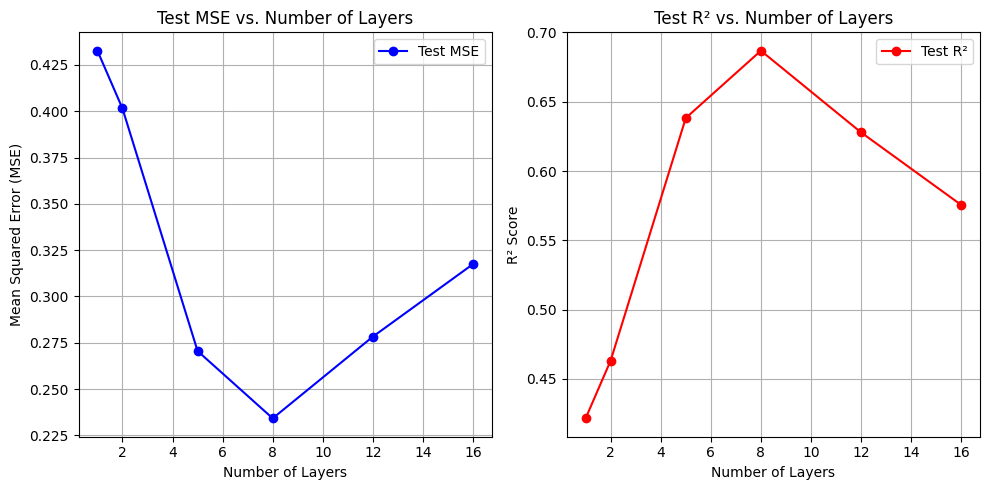

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(results_df['Number of Layers'], results_df['Test MSE'], marker='o', linestyle='-', color='b', label='Test MSE')
plt.xlabel('Number of Layers')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Test MSE vs. Number of Layers')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(results_df['Number of Layers'], results_df['Test R2'], marker='o', linestyle='-', color='r', label='Test R²')
plt.xlabel('Number of Layers')
plt.ylabel('R² Score')
plt.title('Test R² vs. Number of Layers')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

- Parece que un modelo con 8 capas es mejor en este problema, es el codo o pico donde el rendimiento es mejor en test (téngase siempre en cuenta lo explicado sobre data snooping, este caso es didáctico y no se guían las acciones de modelado por medio de mirar test).

In [12]:
# Import `Sequential` from `keras.models`
from keras import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

import numpy as np
from sklearn.model_selection import StratifiedKFold


seed = 7
np.random.seed(seed)

test = np.random.choice(
    X_train.shape[0], size=int(X_train.shape[0] * 0.2), replace=False
)
mse_vals = []
mae_vals = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, val in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(128, input_dim=12, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    model.fit(X_train[train], Y[train], epochs=10, verbose=0)
    mse_aux_value, mae_aux_value = model.evaluate(X_train[val], Y[val], verbose=0)
    mse_vals.append(mse_aux_value)
    mae_vals.append(mae_aux_value)

mse_val_value = np.mean(mse_vals)
mae_val_value = np.mean(mae_vals)

# En caso de haber guardado un modelo...
y_test_pred = model.predict(X_train[test])
mse_test_value, mae_test_value = model.evaluate(X_train[test], Y[test], verbose=0)

print(f"Validation MSE: {mse_val_value:.5f}")
print(f"Validation MAE: {mae_val_value:.5f}")
print(f"Test MSE: {mse_test_value:.5f}")
print(f"Test MAE: {mae_test_value:.5f}")


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation MSE: 0.50072
Validation MAE: 0.54922
Test MSE: 0.46749
Test MAE: 0.53150


# EJERCICIO
- Agregar más unidades ocultas. Partiendo de la configuración de una única capa y 
posteriormente de varias capas, probad con diferente número de neuronas. Construir una tabla 
que recoja tanto los parámetros utilizados, como las métricas y resultados. Comentad los 
resultados y sacar conclusiones.

In [24]:
neuron_list = [64, 128, 256, 512, 1024, 2048]

# Diccionario para almacenar los resultados
results = {
    'Number of Neurons': [],
    'Validation MSE': [],
    'Validation MAE': [],
    'Test MSE': [],
    'Test MAE': [],
    'Test R2': []
}

for n_neurons in neuron_list:
    mse_vals = []
    mae_vals = []

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    for train, val in kfold.split(X, Y):
        model = Sequential()
        model.add(Dense(n_neurons, input_dim=12, activation="relu"))
        model.add(Dense(1))
        model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
        model.fit(X_train[train], Y[train], epochs=epochs, verbose=0)
        mse_aux_value, mae_aux_value = model.evaluate(X_train[val], Y[val], verbose=0)
        mse_vals.append(mse_aux_value)
        mae_vals.append(mae_aux_value)

    mse_val_value = np.mean(mse_vals)
    mae_val_value = np.mean(mae_vals)

    y_test_pred = model.predict(X_train[test])
    mse_test_value, mae_test_value = model.evaluate(X_train[test], Y[test], verbose=0)

    results['Number of Neurons'].append(n_neurons)
    results['Validation MSE'].append(mse_val_value)
    results['Validation MAE'].append(mae_val_value)
    results['Test MSE'].append(mse_test_value)
    results['Test MAE'].append(mae_test_value)
    results['Test R2'].append(r2_score(Y[test], y_test_pred))

results_df = pd.DataFrame(results)
print(results_df)

/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
   Number of Neurons  Validation MSE  Validation MAE  Test MSE  Test MAE  \
0                 64        0.480944        0.536453  0.426018  0.503209   
1                128        0.476268        0.534070  0.415258  0.489816   
2                256        0.496865        0.548628  0.408188  0.494924   
3                512        0.511764        0.554327  0.462939  0.531229   
4               1024        0.524345        0.561168  0.423276  0.501236   
5               2048        0.534723        0.569297  0.399460  0.503390   

    Test R2  
0  0.430369  
1  0.444756  
2  0.454209  
3  0.381002  
4  0.434035  
5  0.465880  


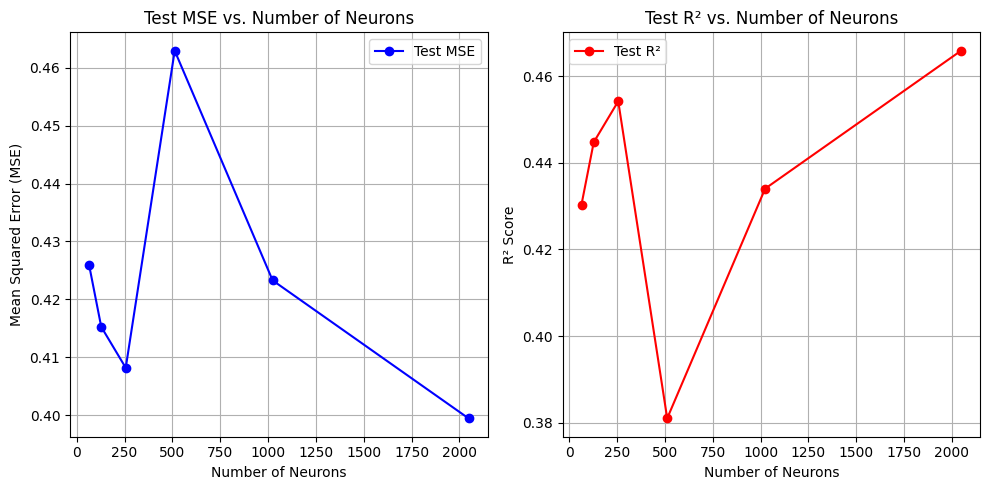

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(results_df['Number of Neurons'], results_df['Test MSE'], marker='o', linestyle='-', color='b', label='Test MSE')
plt.xlabel('Number of Neurons')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Test MSE vs. Number of Neurons')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(results_df['Number of Neurons'], results_df['Test R2'], marker='o', linestyle='-', color='r', label='Test R²')
plt.xlabel('Number of Neurons')
plt.ylabel('R² Score')
plt.title('Test R² vs. Number of Neurons')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

- Mayor número de neuronas también parece mejorar las métricas, pero en este caso vemos como las métricas de validación claramente van empeorando con mayor número de neuronas. El salto de mejora en test es ínfimo teniendo en cuenta que se ha aumentado en considerable medida la complejidad del modelo.

# EJERCICIO
- Usar el menor número de neuronas posible en una red neuronal tiene varias ventajas. En primer lugar, ayuda a evitar el sobreajuste, ya que una red con demasiadas neuronas puede memorizar los datos de entrenamiento en lugar de aprender patrones generalizables, lo que resulta en un buen rendimiento en el conjunto de entrenamiento pero un rendimiento pobre en el conjunto de prueba o validación. 
- Además, reduce el costo computacional, dado que más neuronas implican más parámetros que deben ser calculados y almacenados, lo que incrementa el tiempo de entrenamiento y los requisitos de memoria, lo que puede ser un problema en aplicaciones en tiempo real o con hardware limitado. 
- También disminuye la necesidad de datos, ya que una red más grande requiere más datos para entrenar de manera efectiva, mientras que una red pequeña es menos propensa a sobreajustarse cuando los datos son limitados. 
- Cuando el modelo tarda demasiado tiempo en entrenarse en comparación a la mejora obtenida, se podría considerar que un mayor número de neuronas no es necesario, además que el rendimiento en el conjunto de validación pueda empezar a degradarse es un indicativo.

Usar el menor número de neuronas posible en una red neuronal tiene varias ventajas. En primer lugar, ayuda a evitar el sobreajuste, ya que una red con demasiadas neuronas puede memorizar los datos de entrenamiento en lugar de aprender patrones generalizables, lo que resulta en un buen rendimiento en el conjunto de entrenamiento pero un rendimiento pobre en el conjunto de prueba o validación. Además, reduce el costo computacional, dado que más neuronas implican más parámetros que deben ser calculados y almacenados, lo que incrementa el tiempo de entrenamiento y los requisitos de memoria, lo que puede ser un problema en aplicaciones en tiempo real o con hardware limitado. También disminuye la necesidad de datos, ya que una red más grande requiere más datos para entrenar de manera efectiva, mientras que una red pequeña es menos propensa a sobreajustarse cuando los datos son limitados. Además, las redes más pequeñas son más fáciles de interpretar y analizar, lo cual es crucial en aplicaciones donde la transparencia es importante, como en medicina o finanzas. Por último, una red más pequeña actúa como una forma de regularización implícita, limitando la capacidad del modelo para aprender patrones complejos y potencialmente irrelevantes en los datos.

In [13]:
# Import `Sequential` from `keras.models`
from keras import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

import numpy as np
from sklearn.model_selection import StratifiedKFold


from keras.optimizers import RMSprop


rmsprop = RMSprop(learning_rate=0.0001)
seed = 7
np.random.seed(seed)

test = np.random.choice(
    X_train.shape[0], size=int(X_train.shape[0] * 0.2), replace=False
)
mse_vals = []
mae_vals = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, val in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(128, input_dim=12, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    model.fit(X_train[train], Y[train], epochs=10, verbose=0)
    mse_aux_value, mae_aux_value = model.evaluate(X_train[val], Y[val], verbose=0)
    mse_vals.append(mse_aux_value)
    mae_vals.append(mae_aux_value)

mse_val_value = np.mean(mse_vals)
mae_val_value = np.mean(mae_vals)

# En caso de haber guardado un modelo...
y_test_pred = model.predict(X_train[test])
mse_test_value, mae_test_value = model.evaluate(X_train[test], Y[test], verbose=0)

print(f"Validation MSE: {mse_val_value:.5f}")
print(f"Validation MAE: {mae_val_value:.5f}")
print(f"Test MSE: {mse_test_value:.5f}")
print(f"Test MAE: {mae_test_value:.5f}")


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation MSE: 0.50236
Validation MAE: 0.54813
Test MSE: 0.44116
Test MAE: 0.50757


In [14]:
# Import `Sequential` from `keras.models`
from keras import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

import numpy as np
from sklearn.model_selection import StratifiedKFold

from keras.optimizers import SGD, RMSprop


sgd = SGD(learning_rate=0.1)
seed = 7
np.random.seed(seed)


test = np.random.choice(
    X_train.shape[0], size=int(X_train.shape[0] * 0.2), replace=False
)
mse_vals = []
mae_vals = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, val in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(128, input_dim=12, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    model.fit(X_train[train], Y[train], epochs=10, verbose=0)
    mse_aux_value, mae_aux_value = model.evaluate(X_train[val], Y[val], verbose=0)
    mse_vals.append(mse_aux_value)
    mae_vals.append(mae_aux_value)

mse_val_value = np.mean(mse_vals)
mae_val_value = np.mean(mae_vals)

# En caso de haber guardado un modelo...
y_test_pred = model.predict(X_train[test])
mse_test_value, mae_test_value = model.evaluate(X_train[test], Y[test], verbose=0)

print(f"Validation MSE: {mse_val_value:.5f}")
print(f"Validation MAE: {mae_val_value:.5f}")
print(f"Test MSE: {mse_test_value:.5f}")
print(f"Test MAE: {mae_test_value:.5f}")


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation MSE: 0.50122
Validation MAE: 0.54952
Test MSE: 0.48917
Test MAE: 0.53788


In [15]:
from keras.optimizers import SGD, RMSprop


sgd = SGD(learning_rate=0.1)
seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, Y):
    model2 = Sequential()
    model2.add(Dense(128, input_dim=12, activation="relu"))
    model2.add(Dense(1))
    model2.compile(optimizer="sgd", loss="mse", metrics=["mae"])
    model2.fit(X_train[train], Y[train], epochs=10, verbose=0)
    y_pred = model.predict(X_train[test])


mse_value, mae_value = model.evaluate(X_train[test], Y[test], verbose=0)

print(mse_value)

/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step
0.5235698819160461


In [16]:
from keras.optimizers import SGD, RMSprop


sgd = SGD(learning_rate=0.1)
seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(64, input_dim=12, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="sgd", loss="mse", metrics=["mae"])
    model.fit(X_train[train], Y[train], epochs=10, verbose=0)
    y_pred = model.predict(X_train[test])
mse_value, mae_value = model.evaluate(X_train[test], Y[test], verbose=0)
print(mse_value)

/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.5198273062705994
